# Topic Modeling on newsgroups

## Topic Modeling - Attempt #1 (All Text)

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups()

In [2]:
newsgroups.data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [3]:
for i in range(10):
    print(newsgroups.data[i])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

In [4]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [5]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'),
                            categories=['rec.autos'],
                            #subset='test',
                            #shuffle=True,
                            #random_state=123
                               )

In [7]:
for i in range(10):
    print(newsgroups.data[i])

From article <1993Apr5.200048.23421@ucsu.Colorado.EDU>, by lorenzo@rintintin.Colorado.EDU (Eric Lorenzo):

--Let me put it like this.  The only similarity between the three models
  is the "300", or 3-liter engine displacement.  Actually, the SC300 (the
  coupe) and the GS300 (the funky-looking new sedan) share the same 3.0
  liter inline-six, and the ES300 (popular small sedan) uses 3.0 V6 shared
  with the Camry.  The SC300 is a luxury/sports coupe, the GS300 is the new
  luxury sedan, and the ES300 is the base executive sedan.  All three look
  completely different.

--Aamir Qazi
-- 

Perhaps it is because witnesses who have left the compound have all
testified that the BATF shot first, they they did not identify themselves
before tossing in concussion grenades (not that anyone inside could have
_heard_ such identification after being near a concussion grenade) and
the announcement from the BATF that they have sealed the warrant under
which they were operating - which was a _search_

# A random selection of topics

In [8]:
import pandas as pd
df_news = pd.read_csv("newsgroups1.csv") 
df_news.text=df_news.text.astype(str)

In [9]:
df_news

,text,category
0,\n\nPeter> : > Does anyone have any other sug...,0
1,\n\nI guess you need to be reminded of some th...,3
2,"\n\n\n\nHey, joe -- assuming you're old enough...",3
3,To: turpin@cs.utexas.edu (Russell Turpin)\n\n ...,2
4,I like the Clark-WIlliams-Bonds order.\nPitche...,1
...,...,...
1541,"I sent a version of this post out a while ago,...",1
1542,"Well, the question of why fire equipment took ...",3
1543,"\nI've had neither a baby nor a kidney stone, ...",2
1544,"\n\n\n\n\n\n\n\n\n\nFor one week, she probably...",2


In [10]:
import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('\S*\@\S*', '', text)    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d', '', text)    
    # Remove quotes
#    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Let's take a look at the updated text
df_news_clean = pd.DataFrame(df_news.text.apply(clean_text_1))

In [12]:
df_news_clean

,text
0,peter anyone suggestions came peter yep heres...
1,guess need reminded things ever heard first a...
2,hey joe assuming youre old enough remember fe...
3,russell turpin rt administering treatment kno...
4,like clarkwilliamsbonds order pitchers walk c...
...,...
1541,sent version post ago swallowed void apologie...
1542,well question fire equipment took long reach ...
1543,ive neither baby kidney stone according aunt ...
1544,one week probably wants see react diet change...


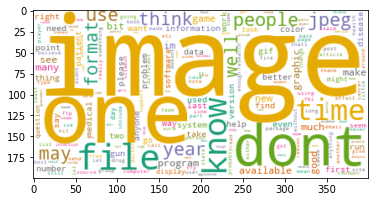

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

alltext=''
for index,row in df_news_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

def lemmatize(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i in word_tokenize(text):
        if len(i) > 3:
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


def lemmatize_tag(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


In [15]:
data_clean = pd.DataFrame(df_news_clean.text.apply(lemmatize))

In [16]:
data_clean=df_news_clean

In [17]:
data_clean

,text
0,peter anyone suggestions came peter yep heres...
1,guess need reminded things ever heard first a...
2,hey joe assuming youre old enough remember fe...
3,russell turpin rt administering treatment kno...
4,like clarkwilliamsbonds order pitchers walk c...
...,...
1541,sent version post ago swallowed void apologie...
1542,well question fire equipment took long reach ...
1543,ive neither baby kidney stone according aunt ...
1544,one week probably wants see react diet change...


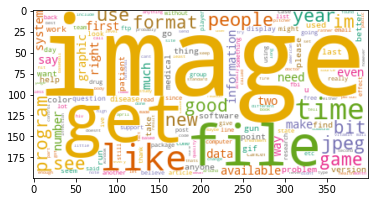

In [18]:
stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['know','well','also','dont','one','would','could','many','may','think'])

alltext=''
for index,row in data_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


## LSA



In [19]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2)
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aaa,aaaaarrrrgh,aagain,aalong,aanerud,aaplay,aarnet,aaron,aatdb,...,zphigs,zugcsmilumichedu,zupcic,zur,zurich,zvi,zyda,zygon,zyxel,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['know','well','also','dont','one','would','could','many','may','think'])

stop_words2.extend(['please','thanks','anyone','someone','think','im','get','people','like','time','good'])

vectorizer = TfidfVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.98)
tfidf = vectorizer.fit_transform(data_clean.text)
len(vectorizer.get_feature_names())

9801

In [21]:
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean.index
data_tfidf

,aaa,aaplay,aaron,aawin,ab,abandon,abbott,abc,abdomen,abdominal,...,zealots,zero,zinc,zip,zoloft,zone,zones,zoom,zooming,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204596,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=8)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)


(8, 9801)
[6.08276253 4.66296069 3.21268078 2.8096235  2.50783255 2.30955863
 2.27519497 2.20885607]


In [23]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
1.00*nan 0.00*bit 0.00*email 0.00*ftp 0.00*looking 0.00*lost 0.00*photography 
Topic 1: 
0.11*game 0.09*image 0.09*see 0.09*year 0.09*first 0.09*even 0.09*bit 
Topic 2: 
0.26*image 0.22*graphics 0.21*bit 0.21*format 0.17*file 0.16*files 0.16*program 
Topic 3: 
0.23*fbi 0.19*fire 0.14*batf 0.12*gun 0.10*koresh 0.10*atf 0.09*government 
Topic 4: 
0.14*cancer 0.13*information 0.12*medical 0.12*chronic 0.11*disease 0.10*patients 0.10*treatment 
Topic 5: 
0.32*list 0.19*mail 0.18*email 0.17*mailing 0.16*send 0.16*looking 0.15*address 
Topic 6: 
0.36*graphics 0.31*computer 0.20*bit 0.18*manchester 0.10*centre 0.10*voice 0.10*computing 
Topic 7: 
0.31*gant 0.31*game 0.20*hirschbeck 0.19*games 0.15*umpire 0.12*strike 0.09*fire 


## LDA

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',min_df=2)#, max_df=.9)
data_cv = cv.fit_transform(data_clean.text)
data = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data.index = data_clean.index
data

,aaa,aaplay,aaron,aawin,ab,abandon,abbott,abc,abdomen,abdominal,...,zealots,zero,zinc,zip,zoloft,zone,zones,zoom,zooming,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from gensim import matutils, models
import scipy.sparse


In [26]:
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaplay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aawin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [28]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [29]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8)
lda.print_topics()

[(0,
  '0.008*"image" + 0.007*"jpeg" + 0.006*"file" + 0.006*"dont" + 0.004*"know" + 0.004*"bit" + 0.004*"like" + 0.004*"use" + 0.004*"people" + 0.004*"format"'),
 (1,
  '0.005*"image" + 0.005*"im" + 0.005*"like" + 0.005*"dont" + 0.005*"jpeg" + 0.004*"file" + 0.004*"graphics" + 0.003*"information" + 0.003*"time" + 0.003*"software"'),
 (2,
  '0.005*"people" + 0.004*"image" + 0.004*"cancer" + 0.004*"use" + 0.003*"bit" + 0.003*"dont" + 0.003*"like" + 0.003*"medical" + 0.003*"know" + 0.003*"patients"'),
 (3,
  '0.005*"like" + 0.004*"time" + 0.004*"think" + 0.003*"use" + 0.003*"gun" + 0.003*"people" + 0.003*"image" + 0.003*"fbi" + 0.003*"dont" + 0.003*"know"'),
 (4,
  '0.008*"image" + 0.005*"know" + 0.004*"dont" + 0.004*"like" + 0.004*"available" + 0.004*"good" + 0.004*"people" + 0.003*"file" + 0.003*"graphics" + 0.003*"use"'),
 (5,
  '0.004*"know" + 0.004*"im" + 0.004*"like" + 0.003*"jpeg" + 0.003*"people" + 0.003*"data" + 0.003*"dont" + 0.003*"time" + 0.003*"image" + 0.003*"think"'),
 (6,


## Topic Modeling - Nouns Only

In [30]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [31]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(df_news_clean.text.apply(nouns))
data_nouns

,text
0,peter anyone suggestions heres peter number te...
1,guess need things amendment guess isnt crime k...
2,hey joe youre remember responsibility time rea...
3,russell turpin rt treatment placebo test treat...
4,clarkwilliamsbonds order pitchers clark outs y...
...,...
1541,version post void apologies anyone wasnt opini...
1542,question fire equipment compound report tapes ...
1543,kidney stone plenty kidney stone worse
1544,week changes anything need calories medium app...


In [32]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = []
#add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
#                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words, min_df=2)#, min_df=.1, max_df=.9)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaplay,aaron,ab,abilities,ability,abortion,abs,absence,absolute,absorption,...,zbuffer,zealand,zealot,zealots,zinc,zip,zone,zones,zoom,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [34]:
# Let's start with  topics
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn,passes=20)
ldan.print_topics()

[(0,
  '0.012*"people" + 0.010*"problem" + 0.009*"computer" + 0.008*"time" + 0.006*"im" + 0.005*"phigs" + 0.005*"case" + 0.005*"research" + 0.005*"person" + 0.004*"hacker"'),
 (1,
  '0.018*"game" + 0.013*"year" + 0.012*"time" + 0.011*"games" + 0.009*"baseball" + 0.009*"team" + 0.008*"players" + 0.007*"dont" + 0.006*"years" + 0.005*"hes"'),
 (2,
  '0.016*"cancer" + 0.008*"treatment" + 0.008*"patients" + 0.007*"vitamin" + 0.006*"drug" + 0.006*"information" + 0.006*"doctor" + 0.006*"health" + 0.005*"time" + 0.005*"group"'),
 (3,
  '0.030*"image" + 0.016*"jpeg" + 0.013*"file" + 0.012*"images" + 0.012*"graphics" + 0.011*"software" + 0.010*"data" + 0.010*"files" + 0.009*"version" + 0.009*"bit"'),
 (4,
  '0.021*"people" + 0.009*"dont" + 0.009*"time" + 0.008*"government" + 0.008*"gun" + 0.007*"children" + 0.007*"way" + 0.006*"evidence" + 0.006*"guns" + 0.006*"batf"'),
 (5,
  '0.011*"aids" + 0.011*"health" + 0.010*"disease" + 0.009*"hiv" + 0.008*"patients" + 0.008*"number" + 0.007*"volume" + 0.

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [35]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [36]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

,text
0,peter anyone suggestions yep heres theory pete...
1,guess need things first amendment guess isnt c...
2,hey joe youre old enough remember presidential...
3,russell turpin rt treatment know rt receive pl...
4,clarkwilliamsbonds order pitchers clark outs l...
...,...
1541,sent version post void apologies anyone wasnt ...
1542,question fire equipment reach compound aired r...
1543,ive baby kidney stone aunt plenty kidney stone...
1544,week react diet changes anything live diet nee...


In [37]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=2)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaa,aaplay,aaron,ab,abbott,abdominal,abilities,ability,abject,able,...,zealand,zealot,zealots,zinc,zip,zoloft,zone,zones,zoom,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [39]:
ldan_2 = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=30)

ldan_2.print_topics()

[(0,
  '0.010*"year" + 0.009*"dont" + 0.009*"good" + 0.008*"time" + 0.008*"game" + 0.007*"games" + 0.007*"im" + 0.006*"team" + 0.005*"baseball" + 0.005*"years"'),
 (1,
  '0.015*"people" + 0.008*"dont" + 0.007*"gun" + 0.007*"time" + 0.007*"fbi" + 0.005*"government" + 0.005*"batf" + 0.005*"way" + 0.004*"children" + 0.004*"right"'),
 (2,
  '0.013*"cancer" + 0.012*"medical" + 0.010*"health" + 0.009*"patients" + 0.009*"disease" + 0.007*"hiv" + 0.007*"drug" + 0.007*"number" + 0.007*"treatment" + 0.007*"infection"'),
 (3,
  '0.008*"game" + 0.008*"gant" + 0.006*"gamma" + 0.005*"chronic" + 0.004*"body" + 0.004*"time" + 0.004*"thanks" + 0.004*"correction" + 0.004*"way" + 0.004*"thats"'),
 (4,
  '0.032*"image" + 0.023*"jpeg" + 0.016*"file" + 0.014*"images" + 0.011*"bit" + 0.011*"format" + 0.010*"gif" + 0.009*"color" + 0.009*"files" + 0.008*"version"'),
 (5,
  '0.012*"graphics" + 0.009*"available" + 0.009*"computer" + 0.008*"data" + 0.008*"information" + 0.007*"software" + 0.006*"ftp" + 0.006*"mai

## Identify Topics in Each Document

In [43]:
corpus_transformed = ldan[corpusn]


In [44]:
list(corpus_transformed)

[[(5, 0.95046616)],
 [(4, 0.9650993)],
 [(0, 0.010536774),
  (1, 0.9475639),
  (2, 0.010454002),
  (3, 0.010432903),
  (4, 0.010542516),
  (5, 0.010469911)],
 [(0, 0.012899921),
  (1, 0.012829648),
  (2, 0.58466536),
  (3, 0.0128952535),
  (4, 0.0128328595),
  (5, 0.363877)],
 [(1, 0.97385097)],
 [(1, 0.9651012)],
 [(0, 0.014065757),
  (1, 0.0139994025),
  (2, 0.22851881),
  (3, 0.014001491),
  (4, 0.5669722),
  (5, 0.16244233)],
 [(0, 0.3411491),
  (1, 0.4359526),
  (2, 0.05566185),
  (3, 0.055811875),
  (4, 0.055654664),
  (5, 0.055769876)],
 [(0, 0.12670319), (1, 0.45376173), (4, 0.4098444)],
 [(0, 0.16666667),
  (1, 0.16666667),
  (2, 0.16666667),
  (3, 0.16666667),
  (4, 0.16666667),
  (5, 0.16666667)],
 [(0, 0.7332843), (2, 0.23757623)],
 [(4, 0.98707384)],
 [(4, 0.963582)],
 [(1, 0.22786272), (4, 0.3742959), (5, 0.38495168)],
 [(0, 0.01192865),
  (1, 0.011988746),
  (2, 0.011914505),
  (3, 0.94026303),
  (4, 0.011982771),
  (5, 0.011922325)],
 [(0, 0.88040894),
  (1, 0.023867624

In [45]:
topic_prediction=[]
for j in list(corpus_transformed):
    main_topic=j[0][0]
    weigth=j[0][1]
    for t,w in j:
        if w > weigth :
            main_topic=t
            weigth=w
    topic_prediction.append(main_topic)


In [46]:
topic_prediction

[5,
 4,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 0,
 0,
 4,
 4,
 5,
 3,
 0,
 3,
 4,
 2,
 0,
 3,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 5,
 2,
 1,
 2,
 0,
 3,
 4,
 4,
 4,
 1,
 2,
 4,
 0,
 0,
 4,
 2,
 0,
 4,
 4,
 1,
 4,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 2,
 0,
 0,
 1,
 4,
 3,
 1,
 1,
 3,
 3,
 4,
 3,
 3,
 4,
 1,
 1,
 2,
 3,
 2,
 4,
 2,
 5,
 1,
 1,
 5,
 3,
 1,
 2,
 4,
 2,
 4,
 0,
 0,
 3,
 4,
 2,
 5,
 4,
 2,
 3,
 4,
 4,
 5,
 2,
 1,
 4,
 4,
 4,
 3,
 1,
 4,
 4,
 1,
 2,
 5,
 3,
 1,
 4,
 0,
 1,
 1,
 0,
 4,
 1,
 1,
 1,
 5,
 0,
 2,
 4,
 2,
 1,
 1,
 4,
 0,
 4,
 5,
 4,
 1,
 4,
 4,
 0,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 0,
 2,
 1,
 1,
 4,
 0,
 4,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 5,
 0,
 3,
 1,
 0,
 1,
 5,
 3,
 3,
 5,
 1,
 0,
 4,
 1,
 1,
 3,
 2,
 0,
 1,
 1,
 4,
 0,
 4,
 4,
 2,
 5,
 1,
 0,
 3,
 3,
 1,
 2,
 3,
 1,
 0,
 4,
 4,
 4,
 1,
 2,
 4,
 3,
 5,
 3,
 1,
 2,
 1,
 0,
 4,
 2,
 4,
 3,
 2,
 1,
 1,
 0,
 4,
 3,
 2,
 1,
 4,
 4,
 3,
 1,
 0,
 0,
 4,
 5,
 2,
 1,
 4,
 4,
 1,
 1,
 4,


In [47]:
df_news.category

0       0
1       3
2       3
3       2
4       1
       ..
1541    1
1542    3
1543    2
1544    2
1545    3
Name: category, Length: 1546, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_news.category,topic_prediction)

array([[ 68,  14,  17, 262,  14,  14],
       [ 35, 288,  24,   6,  25,  19],
       [ 59,  39, 171,  12,  69,  46],
       [ 37,  51,  17,   2, 246,  11],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [ ]:
cat=['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.guns']